In [25]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
%autoreload 
import pandas as pd
import tensorflow as tf
import autokeras as ak

import utilities2 as ut

In [3]:
data_list = ut.read_data()
DataProcessor = ut.DataProcessor(data_list)
df = DataProcessor.create_train_data()

In [12]:
FEATURES = list(df.columns)
FEATURES.remove('pv_measurement')
TARGET =  'pv_measurement'

X_train = df[FEATURES]
y_train = df[TARGET]

FEATURES_OPTIMIZED = ['direct_rad:W', 'building', 'sun_elevation:d', 'sun_azimuth:d', 'day_of_year', 'air_density_2m:kgm3',
                      'wind_speed_u_10m:ms','msl_pressure:hPa', 'cloud_base_agl:m', 'ceiling_height_agl:m', 'visibility:m',
                      'relative_humidity_1000hPa:p', 'effective_cloud_cover:p', 'fresh_snow_24h:cm',
                      'fresh_snow_6h:cm', 'fresh_snow_1h:cm', 'day_of_month', 'year', 'hour']

X_train_FE = X_train[FEATURES_OPTIMIZED]

# 'snow_density:kgm3', 'snow_drift:idx','absolute_humidity_2m:gm3', 
#                 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J',
#                 'direct_rad_1h:J', 'elevation:m', 'fresh_snow_12h:cm', 'fresh_snow_3h:cm', 'is_day:idx', 
#                 'pressure_100m:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa', 't_1000hPa:K', 'total_cloud_cover:p')

In [5]:
# Initialize the structured data regressor.
reg_standard = ak.StructuredDataRegressor(
    overwrite=True, max_trials=10, loss='mean_absolute_error'
)  # It tries 10 different models.

In [6]:
reg_standard.fit(X_train, y_train, epochs=10) # Train the model with the best model

Trial 10 Complete [00h 01m 11s]
val_loss: 138.6887969970703

Best val_loss So Far: 136.19903564453125
Total elapsed time: 00h 10m 50s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
2905/2905 [==============================] - 5s 1ms/step - loss: 140.8141 - mean_squared_error: 172116.8750
Epoch 2/10
2905/2905 [==============================] - 4s 1ms/step - loss: 106.7174 - mean_squared_error: 113765.9453
Epoch 3/10
2905/2905 [==============================] - 4s 1ms/step - loss: 102.5213 - mean_squared_error: 101622.8125
Epoch 4/10
2905/2905 [==============================] - 4s 1ms/step - loss: 100.7103 - mean_squared_error: 93641.3672
Epoch 5/10
2905/2905 [==============================] - 4s 1ms/step - loss: 99.1977 - mean_squared_error: 89469.0859
Epoch 6/10
2905/2905 [==============================] - 4s 1ms/step - loss: 98.0972 - mean_squared_error: 87936.4922
Epoch 7/10
2905/2905 [==============================] - 4s 1ms/step - loss: 96.6627 - mean_squared_error: 86357.9453
Ep

In [7]:
reg_optimized = ak.StructuredDataRegressor(
    overwrite=True, max_trials=10, loss='mean_absolute_error'
)  # It tries 10 different models.

In [8]:
reg_optimized.fit(X_train_FE, y_train, epochs=10) # Train the model with the best model

Trial 10 Complete [00h 00m 36s]
val_loss: 150.18218994140625

Best val_loss So Far: 143.01795959472656
Total elapsed time: 00h 05m 56s
INFO:tensorflow:Oracle triggered exit


Epoch 1/10
2905/2905 [==============================] - 3s 794us/step - loss: 180.3241 - mean_squared_error: 291247.8125
Epoch 2/10
2905/2905 [==============================] - 2s 809us/step - loss: 128.4835 - mean_squared_error: 133142.1406
Epoch 3/10
2905/2905 [==============================] - 2s 801us/step - loss: 115.8193 - mean_squared_error: 106322.8281
Epoch 4/10
2905/2905 [==============================] - 2s 814us/step - loss: 112.0877 - mean_squared_error: 101909.2891
Epoch 5/10
2905/2905 [==============================] - 2s 801us/step - loss: 110.3579 - mean_squared_error: 100939.9297
Epoch 6/10
2905/2905 [==============================] - 2s 805us/step - loss: 108.3871 - mean_squared_error: 99131.0234
Epoch 7/10
2905/2905 [==============================] - 2s 804us/step - loss: 107.6894 - mean_squared_error: 99509.7812
Epoch 8/10
2905/2905 [==============================] - 2s 810us/step - loss: 107.0974 - mean_squared_error: 99002.3516
Epoch 9/10
2905/2905 [=============

In [13]:
test = DataProcessor.create_test_data()
X_test = test[FEATURES]

In [22]:
predicted_y_standard = reg_standard.predict(X_test[FEATURES_OPTIMIZED])

270/270 [==============================] - 0s 742us/step


In [11]:
predicted_y_optimized = reg_optimized.predict(X_test[FEATURES_OPTIMIZED])

270/270 [==============================] - 0s 690us/step


In [23]:
results_optimized = ut.create_results_dataframe(test, predicted_y_optimized)
results_standard = ut.create_results_dataframe(test, predicted_y_standard)


In [24]:
ut.save_to_csv(results_optimized, 'results_optimized')
ut.save_to_csv(results_standard, 'results_standard')

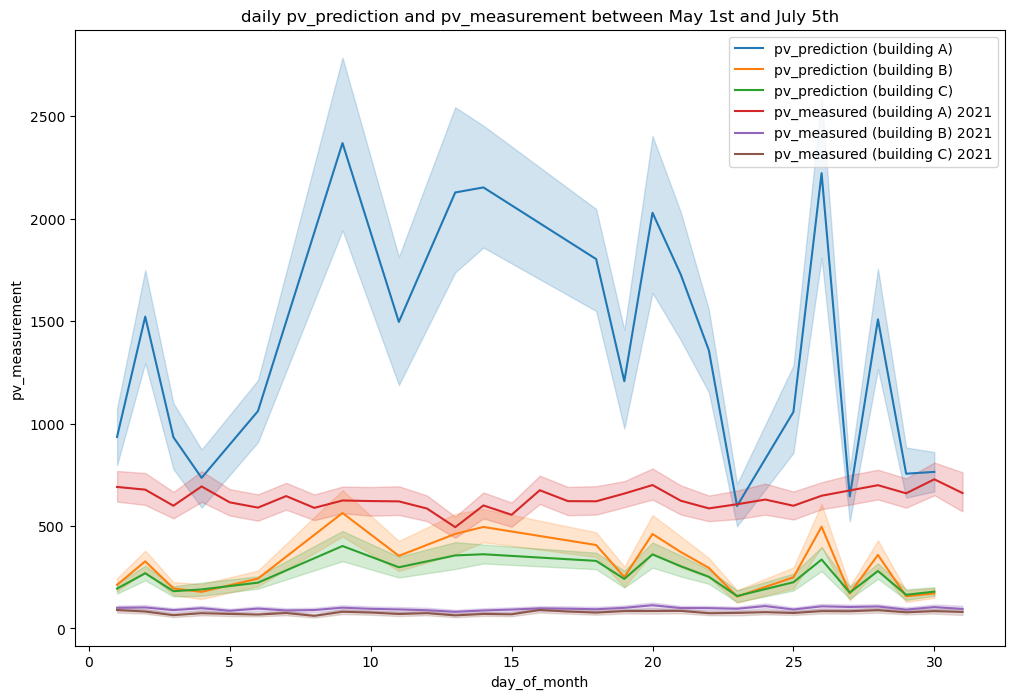

In [30]:
ut.plot_results_daily(df,results_optimized)